## 집값 예측 경진 대회
### 1. 데이터 정리
- target은 salesprice이고 정수값이다.
- 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 데이터를 분석하고 시각화하자.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
data=pd.read_csv('./housing/train.csv')

In [8]:
data=data.drop('id',axis=1)
#id는 제외하고 분석한다.

print(data)

      Overall Qual  Gr Liv Area Exter Qual  Garage Cars  Garage Area  \
0               10         2392         Ex            3          968   
1                7         1352         Gd            2          466   
2                5          900         TA            1          288   
3                5         1174         TA            2          576   
4                7         1958         Gd            3          936   
...            ...          ...        ...          ...          ...   
1345             6         1756         Gd            2          422   
1346             9         2748         Gd            3          850   
1347             5         1214         TA            1          318   
1348             5          894         TA            2          440   
1349             5          907         TA            1          343   

     Kitchen Qual  Total Bsmt SF  1st Flr SF Bsmt Qual  Full Bath  Year Built  \
0              Ex           2392        2392        Ex

- 숫자 형태의 변수, 텍스트로 이루어진 범주형 변수 등 다양하다.
### 1-1. 결측치 확인
- 결측치를 확인하는 함수를 만들어보자.

In [9]:
def check_missing_col(dataframe):
    missing_col=[]
    for col in dataframe.columns:
        missing_values=sum(dataframe[col].isna())
        is_missing=True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총{missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col,dataframe[col].dtype]) #리스트 끝에 추가
    if missing_col==[]:
        print('결측치가 존재하지 않습니다')
    return missing_col

#데이터 함수에 대입하기
missing_col=check_missing_col(data)

결측치가 존재하지 않습니다


- 데이터에 결측치가 존재하지 않는다.
- 결측치 처리 과정을 하지 않아도 된다.
### 1-2. 기초 통계 분석

In [11]:
data.describe() #분포, 평균, 분산 등 나타내기

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


- 분석의 편의를 위해 수치형 feature와 카테고리형 feature를 분리해주자.

In [38]:
#데이터 타입 확인하기
data.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [44]:
numeric_feature=data.columns[(data.dtypes==np.int64)|(data.dtypes==np.float64)]
categorical_feature=data.columns[data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n",list(numeric_feature))
print("범주형 데이터는 다음과 같습니다. \n",list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
범주형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


### 1-3. 수치형 데이터 시각화
- Box plot을 이용할 것이다.

In [49]:
%matplotlib inline #이거 쓰면 굳이 print안해도 그래프 그려줌

UsageError: unrecognized arguments: #이거 쓰면 굳이 print안해도 그래프 그려줌


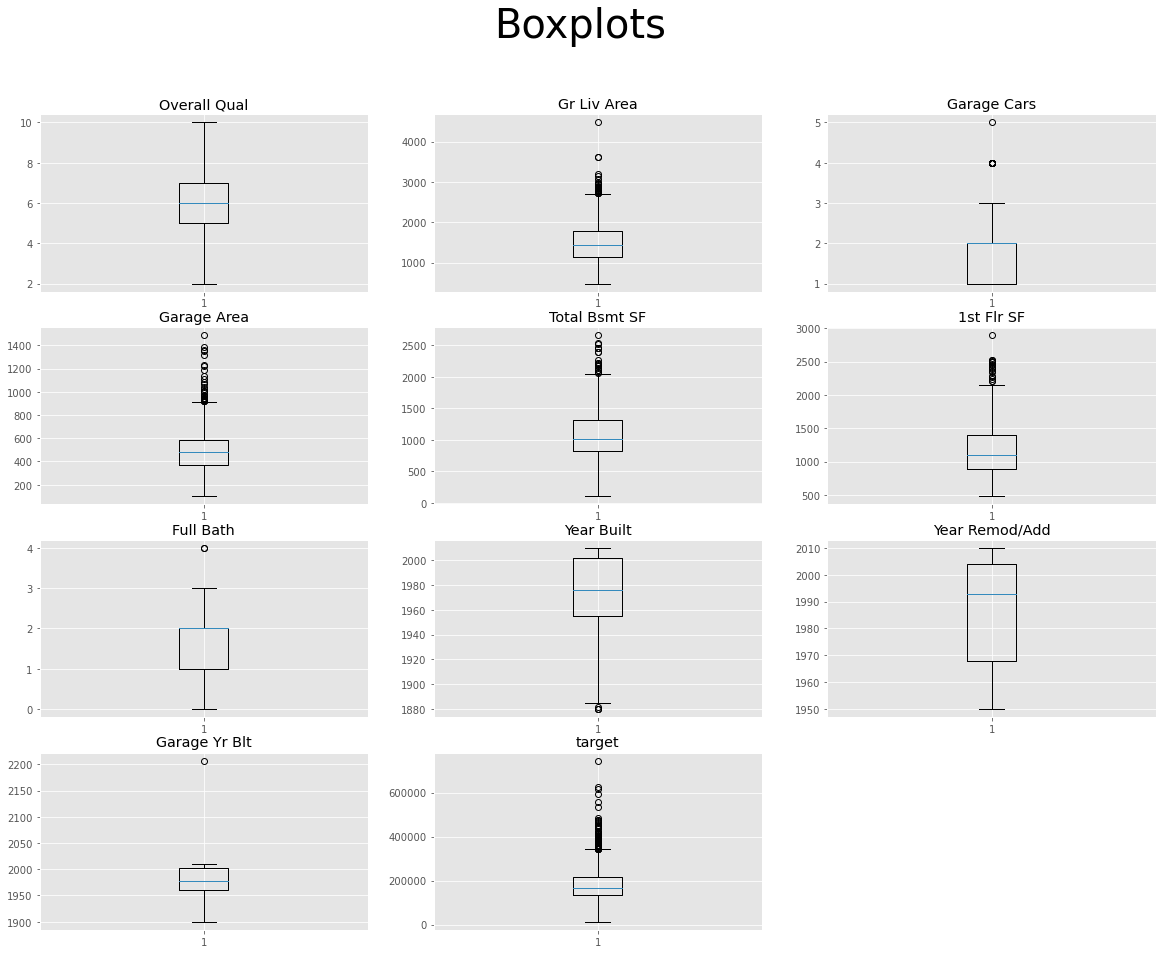

In [51]:

plt.style.use("ggplot")

feature=numeric_feature

#Boxplot을 이용해서 데이터 분포를 살피자
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots",fontsize=40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1) #수치형 데이터가 11개이므로 4*3개 자리가 필요하다.
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])

plt.show()


- Gr_Liv_Area, Garage Area, Total Bsmt SF, 1st Flr SF, target 에서 이상치가 많이 존재하고 Garage_cars에서 이상치가 존재한다.
### 1-4. 범주형 데이터 시각화
- Bar plot을 이용해 범주형 데이터를 시각화하자.

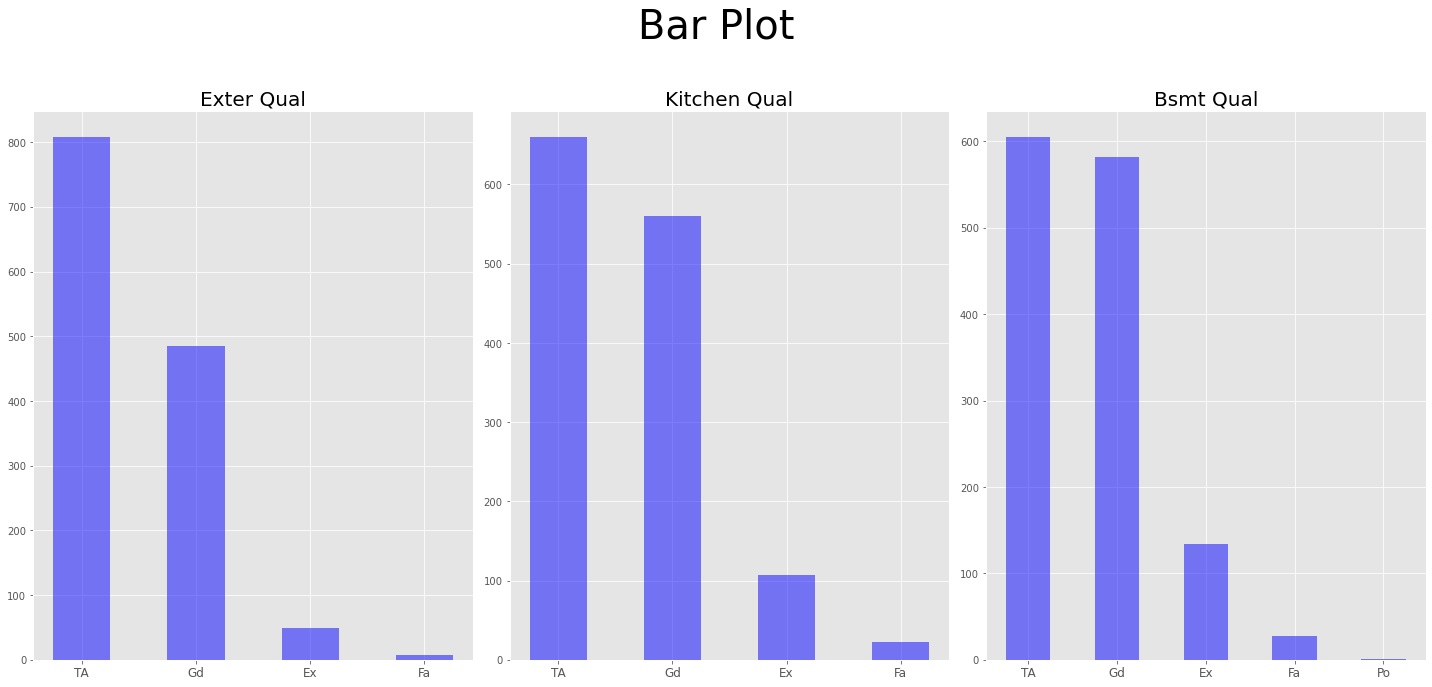

In [52]:
feature=categorical_feature

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot",fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i],fontsize=20)
    temp=data[feature[i]].value_counts()
    plt.bar(temp.keys(),temp.values,width=0.5,color='b',alpha=0.5)
    plt.xticks(temp.keys(),fontsize=12)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

- 범주형 변수들의 그래프는 특정 값들에 몰려 있다.
### 1-5. 상관관계 시각화
- feature들 간의 상관관계를 heat_table로 살펴보자.
- 전체 feature들 간의 상관관계를 살펴보고 주요feature와 타겟feature의 상관관계를 산점도로 살펴보자.

In [54]:
corr_df=data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']]=corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#str로 데이터 형 바꾸기 str은 글자, unicode를 말함.

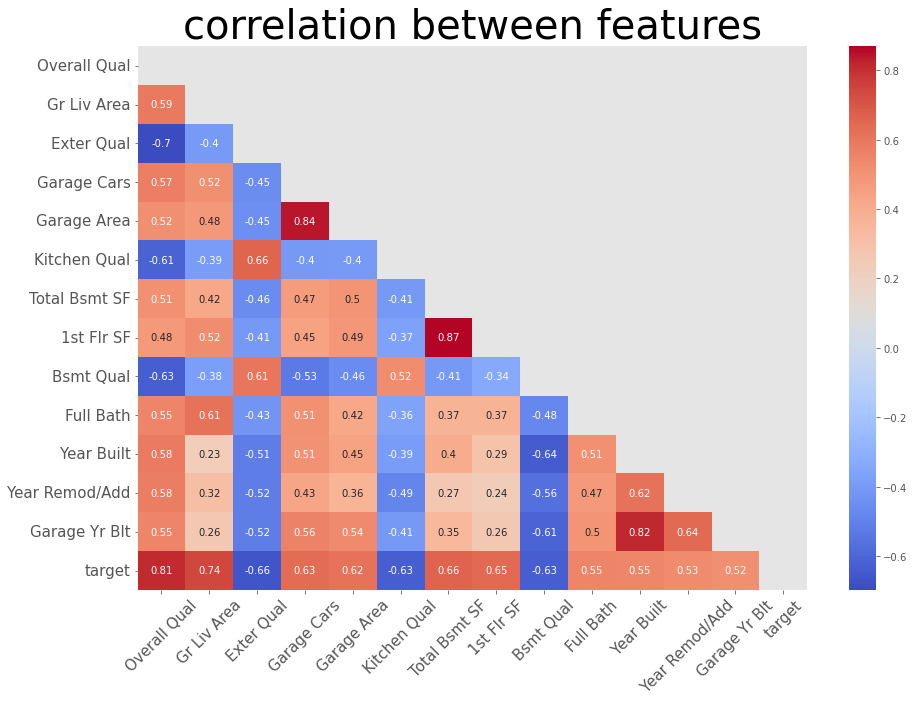

In [56]:
plt.figure(figsize=(15,10))

heat_table=corr_df.corr()
mask=np.zeros_like(heat_table) #<<<<<<<
mask[np.triu_indices_from(mask)]=True #<<<<<<<<
heatmap_ax=sns.heatmap(heat_table,annot=True,mask=mask,cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(),fontsize=15,rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(),fontsize=15)
plt.title('correlation between features',fontsize=40)
plt.show()

- target feature인 Saleprice는 Overall Qual과 가장 큰 상관관계를 가진다.
- 그 외에도 Gr Liv Area(0.74),Garage Cars(0.63),1st Flr SF(0.65),Total Bsmt SF(0.66)
#### 1-6. target과 다른 feature들 사이의 관계
- target과 수치형feature의 관계

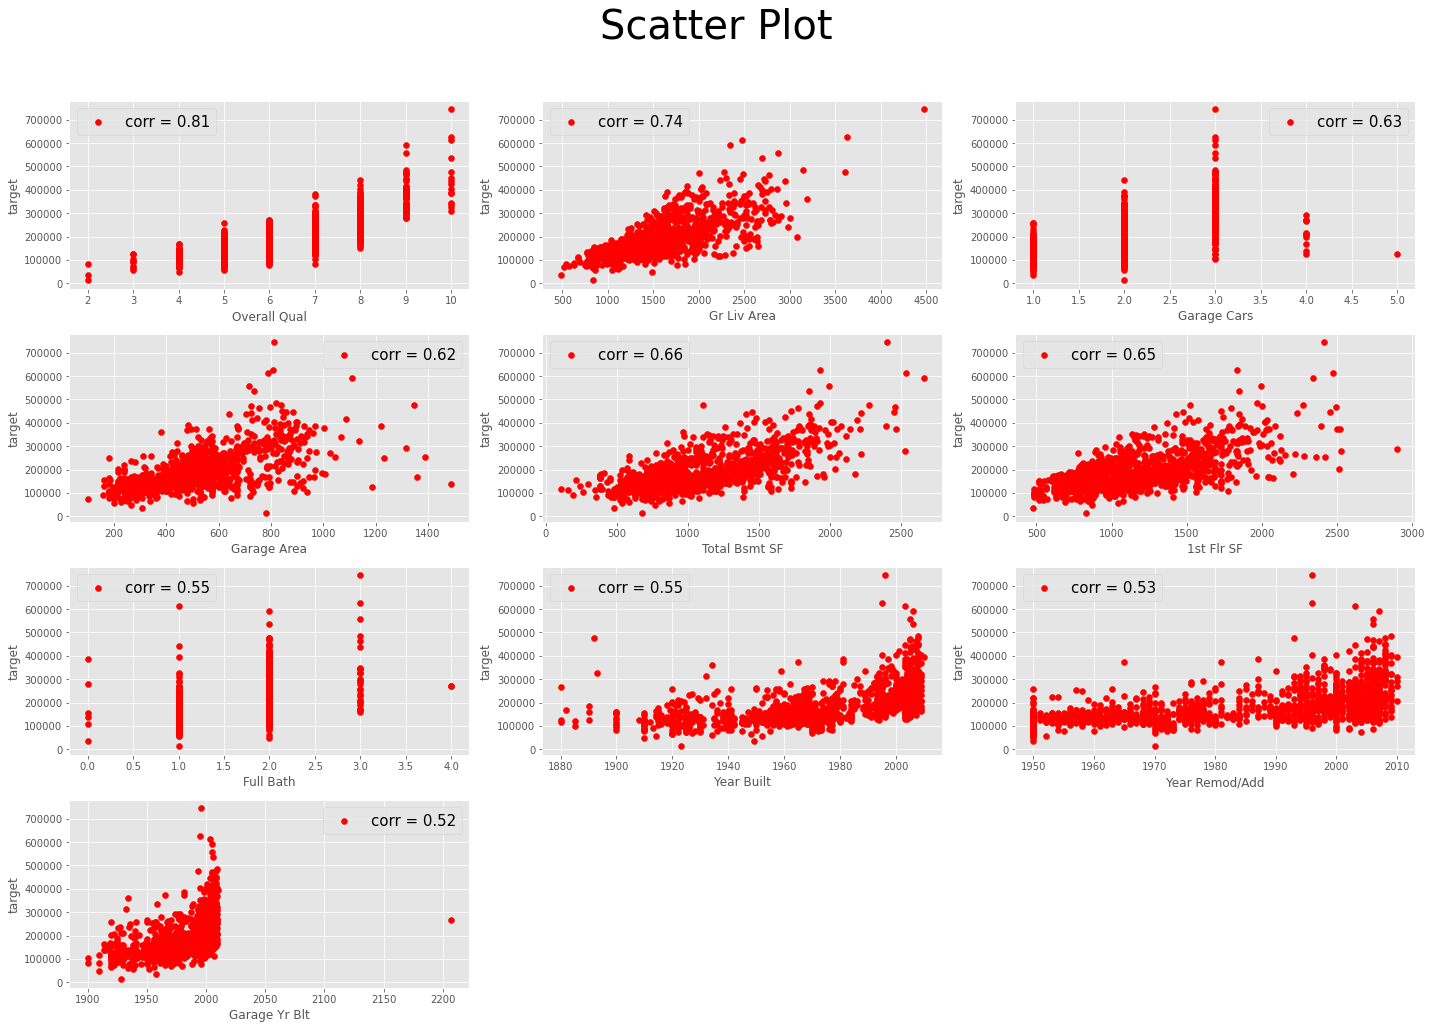

In [62]:
target="target"

feature=numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot",fontsize=40)

#id는 제외하고 시각화
for i in range(len(feature[:-1])):
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score=data[[feature[i],target]].corr().iloc[0,1].round(2)
    c='red' if corr_score>0 else 'blue' #<< 수치형은 모두 양의 상관관계
    plt.scatter(data[feature[i]],data[target],color=c,label=f"corr = {corr_score}")
    plt.legend(fontsize=15)

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

> 타겟과 피쳐 사이에 상관관계가 음수인 항목은 왜 없어졌지?> 수치형만 계산해서!

- target과 범주형 feature 사이의 관계

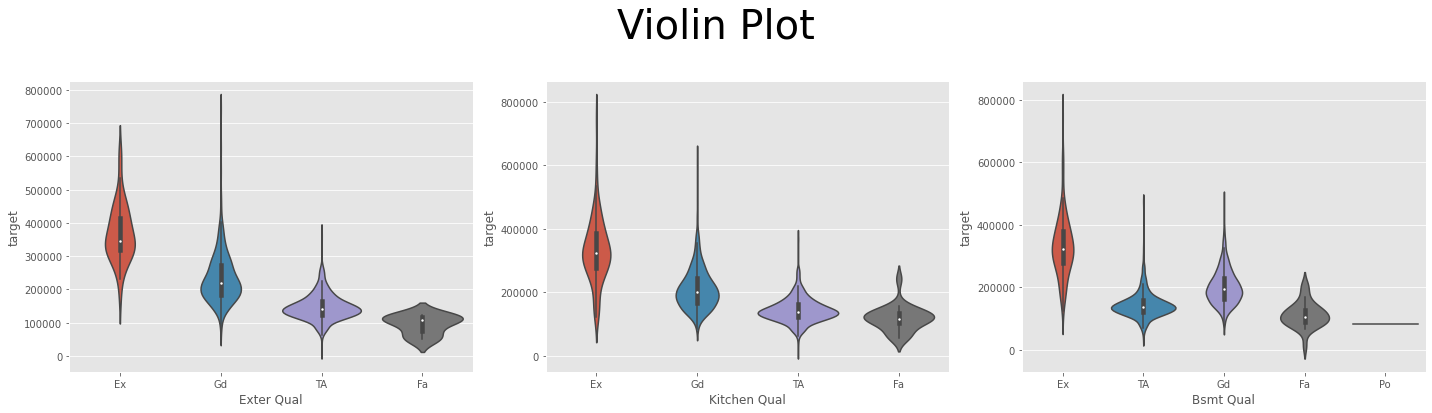

In [63]:
feature=categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot",fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x=data[feature[i]],y=data[target])
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

- EX에 해당하는 값들이 범주형 변수 전반에 걸쳐 상대적으로 높은 집값 분포를 나타낸다.

### 2. 데이터 설명 방정식 만들기
#### 2-1. Y=ax+b 
- 먼저 단순하게 X={[Gr Liv Area]}만을 이용하고 Y={[SalePrice]}만 이용해보자.

In [65]:
train=data
train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [67]:
x_feature='Gr Liv Area'
y_feature='target'

X=train[x_feature]
Y=train[y_feature]

print(X,Y)

0       2392
1       1352
2        900
3       1174
4       1958
        ... 
1345    1756
1346    2748
1347    1214
1348     894
1349     907
Name: Gr Liv Area, Length: 1350, dtype: int64 0       386250
1       194000
2       123000
3       135000
4       250000
         ...  
1345    204000
1346    390000
1347    143000
1348    131000
1349    140000
Name: target, Length: 1350, dtype: int64


In [68]:
X_mean=np.mean(X)
Y_mean=np.mean(Y)

relation=Y_mean/X_mean

print(f"{x_feature}의 평균:{X_mean:.2f} \n{y_feature}의 평균:{Y_mean:.2f}")
print(f"따라서 {y_feature}는 {x_feature}의 평균 {relation:.2f}배 입니다.")
print(f"즉, a={relation:.2f}입니다.")
a=round(relation,2)
print(f"업데이트 된 방정식: Y={a:.2f}*X+b")

Gr Liv Area의 평균:1513.54 
target의 평균:186406.31
따라서 target는 Gr Liv Area의 평균 123.16배 입니다.
즉, a=123.16입니다.
업데이트 된 방정식: Y=123.16*X+b


- a를 구했으니 b를 구해보자.

In [69]:
b=Y_mean -a*X_mean

print(f"b는 {b:.2f} 입니다.")
print(f"업데이트 된 방정식: Y={a:.2f}*X+{b:.2f}")

b는 -1.55 입니다.
업데이트 된 방정식: Y=123.16*X+-1.55


In [70]:
predict_Y=a*X+b
predict_Y

0       294597.172504
1       166510.772504
2       110842.452504
3       144588.292504
4       241145.732504
            ...      
1345    216267.412504
1346    338442.132504
1347    149514.692504
1348    110103.492504
1349    111704.572504
Name: Gr Liv Area, Length: 1350, dtype: float64

#### 2-2. 예측결과 평가하기.
- 이번 대회의 평가 지표(metric)는 NMAC,Normalized Mean Absolute Error
- 정규화된 실제 값과 예측 값의 차이를 절대값으로 변환해 평균낸 것.
- 

In [71]:
# 대회 규칙의 평가 산식 함수를 그대로 사용.

def NMAE(true,pred):
    mae=np.mean(np.abs(true-pred))
    score=mae/np.mean(np.abs(true))
    return score

In [72]:
real_answer=Y.copy()
error=NMAE(real_answer,predict_Y)

print(f"이 방정식의 평균 에러는 {error:.2f}입니다.")

이 방정식의 평균 에러는 0.20입니다.


#### 2-3. test data 예측하기

In [73]:
test=pd.read_csv("./housing/test.csv")

test.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [74]:
test_X=test[x_feature]
predict_test=a*test_X+b
predict_test

0       221686.452504
1       133257.572504
2       193729.132504
3       300878.332504
4       128084.852504
            ...      
1345    237943.572504
1346    112320.372504
1347    106039.212504
1348    176117.252504
1349    287823.372504
Name: Gr Liv Area, Length: 1350, dtype: float64

In [76]:
#제출용 샘플 파일에 입력
submission=pd.read_csv("./housing/sample_submission.csv")
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [77]:
submission[y_feature]=predict_test
submission

,id,target
0,1,221686.452504
1,2,133257.572504
2,3,193729.132504
3,4,300878.332504
4,5,128084.852504
...,...,...
1345,1346,237943.572504
1346,1347,112320.372504
1347,1348,106039.212504
1348,1349,176117.252504


In [78]:
#submission을 csv파일로 저장한다.
submission.to_csv("submission.csv",index=False)

### 3. GB+RF+CB+NGB
- Gradient Boost
- Random Forest
- CatBoost
- NGBoost
#### 3-1. 데이터 준비

In [92]:
train=pd.read_csv("./housing/train.csv")
test=pd.read_csv("./housing/test.csv")
#id 변수 제거
train=train.iloc[:,1:]
test=test.iloc[:,1:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 137.2+ KB


In [94]:
train.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [95]:
test.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.237037,1524.071111,1.871852,499.867407,1101.222222,1175.714815,1.597778,1973.537778,1985.258519,1978.457037
std,1.370057,514.410852,0.651639,186.267579,431.641042,406.858231,0.549002,29.799448,20.818442,25.771750
min,2.000000,407.000000,1.000000,160.000000,173.000000,407.000000,0.000000,1879.000000,1950.000000,1895.000000
25%,5.000000,1169.750000,1.000000,365.250000,825.250000,887.250000,1.000000,1956.000000,1966.000000,1961.000000
50%,6.000000,1472.500000,2.000000,484.000000,1024.000000,1098.000000,2.000000,1976.000000,1995.000000,1982.000000
75%,7.000000,1742.250000,2.000000,578.750000,1338.750000,1409.500000,2.000000,2002.000000,2004.000000,2002.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,5095.000000,4.000000,2010.000000,2010.000000,2010.000000


#### 3-2. Target Encoding
- 변수 값별 target의 중위값으로 인코딩

In [96]:
cat_cols = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

for c in cat_cols :
    ord_df = train.groupby(c).target.median().reset_index(name = f'ord_{c}')
    train = pd.merge(train, ord_df, how = 'left')
    test = pd.merge(test, ord_df, how = 'left')

#인코딩 이후 기존 칼럼 삭제
train.drop(cat_cols, axis = 1, inplace = True)
test.drop(cat_cols, axis = 1, inplace = True)

In [97]:
print(f'로그 변환 전 타겟 왜도 = {train.target.skew()} / 로그 변환 후 타겟 왜도 = {np.log1p(train.target).skew()}')

로그 변환 전 타겟 왜도 = 1.7175856695235343 / 로그 변환 후 타겟 왜도 = 0.08072456642342425


In [98]:
X = train.drop('target', axis = 1)
y = np.log1p(train.target)

target = test[X.columns]

In [99]:
target.fillna(target.mean(), inplace = True)
# 결측값을 평균값으로 대치

#### 3-3. Modeling

In [101]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [102]:
def NMAE(true, pred) -> float:
    mae = np.mean(np.abs(true - pred))
    score = mae / np.mean(np.abs(true))
    return score

In [103]:
nmae_score = make_scorer(NMAE, greater_is_better=False)

In [104]:
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)